In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/drive/MyDrive/CA/WHR-2024-5CS037.csv')
print(data.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
rows,columns = data.shape
print(f"The data has {rows} rows and {columns} columns")

The data has 143 rows and 9 columns


In [7]:
types = data.dtypes
print(types)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


Basic Statistics

In [8]:
meann = data['score'].mean()
mediann = data['score'].median()
stdDev = data['score'].std()
print(f"Mean: {meann}")
print(f"Median: {mediann}")
print(f"Standard Deviation: {stdDev}")

Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995


In [9]:
highest = data['score'].max()
lowest = data['score'].min()
highest_country = data.loc[data['score'].idxmax(),'Country name']
lowest_country = data.loc[data['score'].idxmin(),'Country name']
print(f"Highest score: {highest} Country:{highest_country}")
print(f"Lowest score: {lowest} Country:{lowest_country}")

Highest score: 7.741 Country:Finland
Lowest score: 1.721 Country:Afghanistan


In [10]:
missing_values = data.isnull().sum()
print(f"Missing values: \n{missing_values}")

Missing values: 
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [11]:
data = pd.read_csv('/content/drive/MyDrive/CA/WHR-2024-5CS037.csv')
greater_country  =  data[data['score']>7.5]
print(greater_country)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [12]:
filtered_data = data[data['score'] > 7.5]
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
top_10 = sorted_data.head(10)
print(top_10)

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [13]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'
data['Happiness Category'] = data['score'].apply(categorize_happiness)
print(data[['Country name', 'score', 'Happiness Category']])


         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


<ipython-input-14-11d0ba72e668>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')


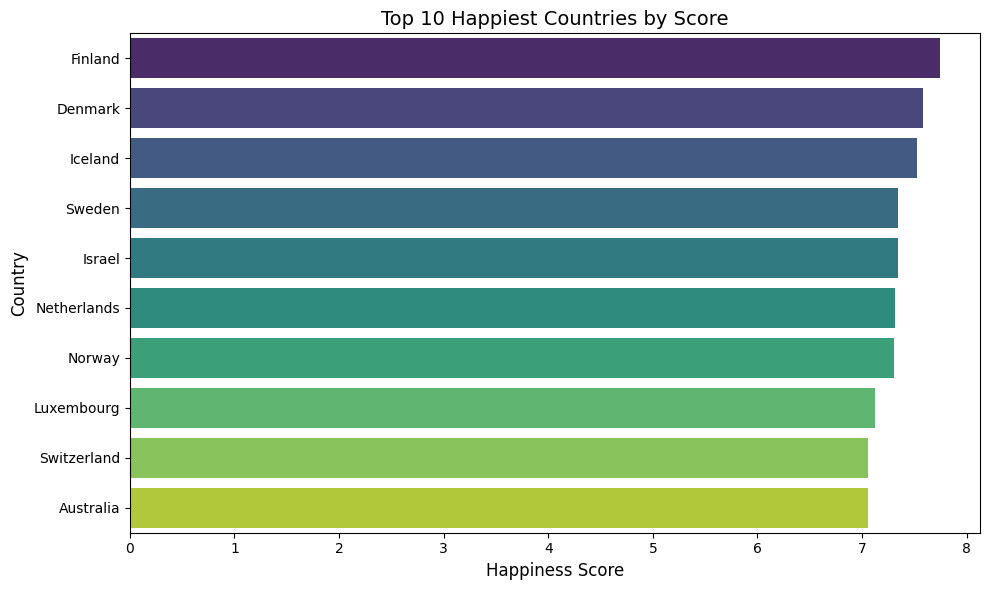

In [14]:
top_10_happiest = data.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 10 Happiest Countries by Score', fontsize=14)
plt.tight_layout()
plt.show()

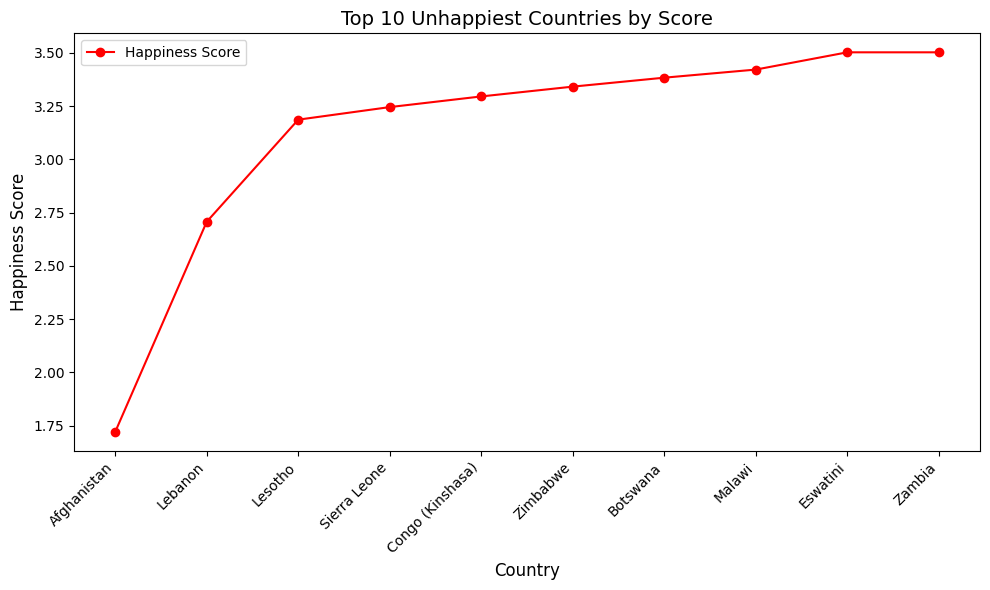

In [15]:
top_10_unhappiest = data.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='red', label='Happiness Score')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Top 10 Unhappiest Countries by Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

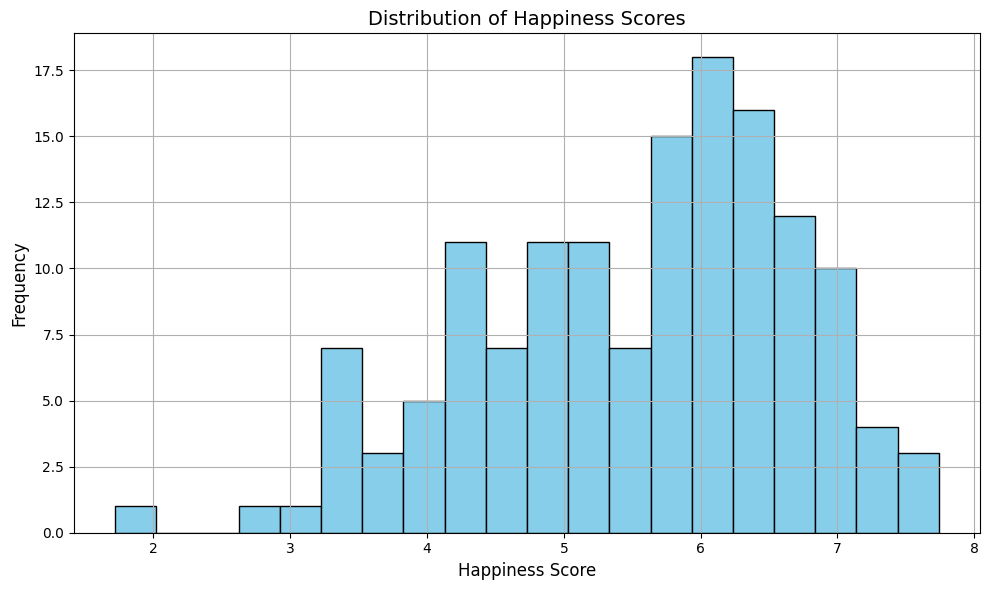

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(data['score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Happiness Scores', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

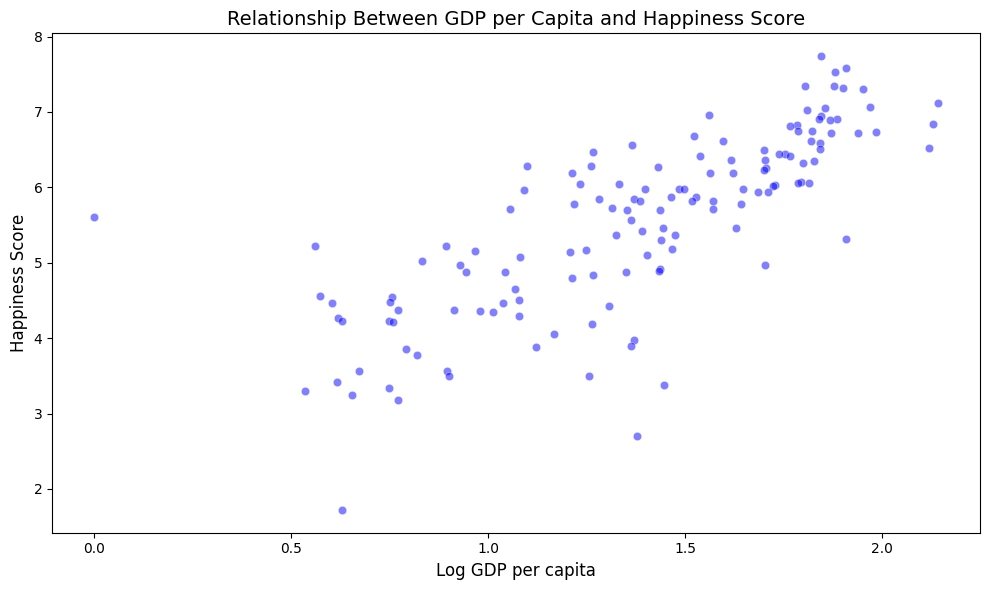

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, color='blue', alpha=0.5)
plt.xlabel('Log GDP per capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Relationship Between GDP per Capita and Happiness Score', fontsize=14)
plt.tight_layout()
plt.show()

Problem 2

In [18]:
# List of South Asian countries
south_asian_countries = [
"Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
"Nepal", "Pakistan", "Sri Lanka"
]
# Load the original dataset
happiness_df = pd.read_csv('/content/drive/MyDrive/CA/WHR-2024-5CS037.csv')
# Step 2: Filter the dataset for South Asian countries
south_asian_data = happiness_df[happiness_df['Country name'].isin(south_asian_countries)]

# Step 3: Save the filtered dataframe to a new CSV file
south_asian_data.to_csv('/content/drive/MyDrive/CA/south_asian_data.csv', index=False)
#output
print(south_asian_data.head())

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual  
92                       0.115                1.783  
107                      0.074                1.907  
125           

<ipython-input-20-e2b9200fe6c1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite data', y='Country name', data=top_5_countries, palette='coolwarm')


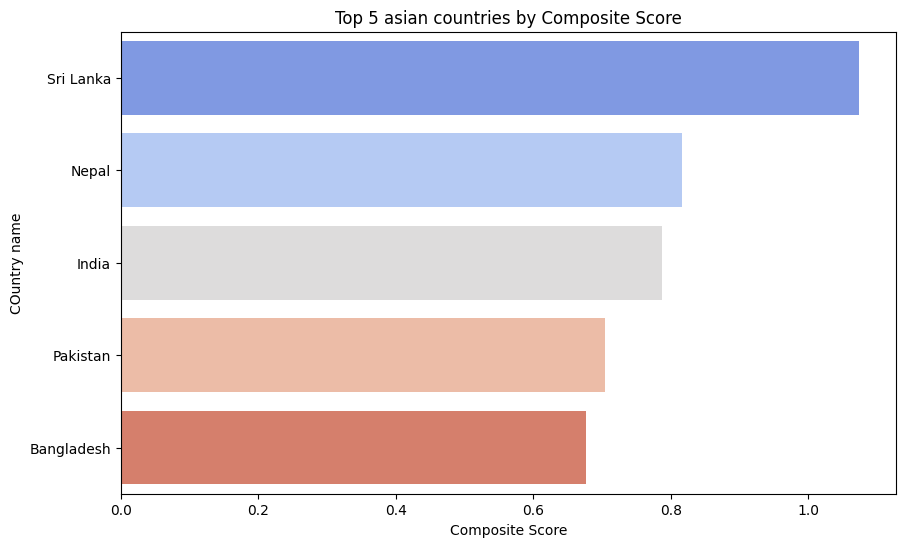

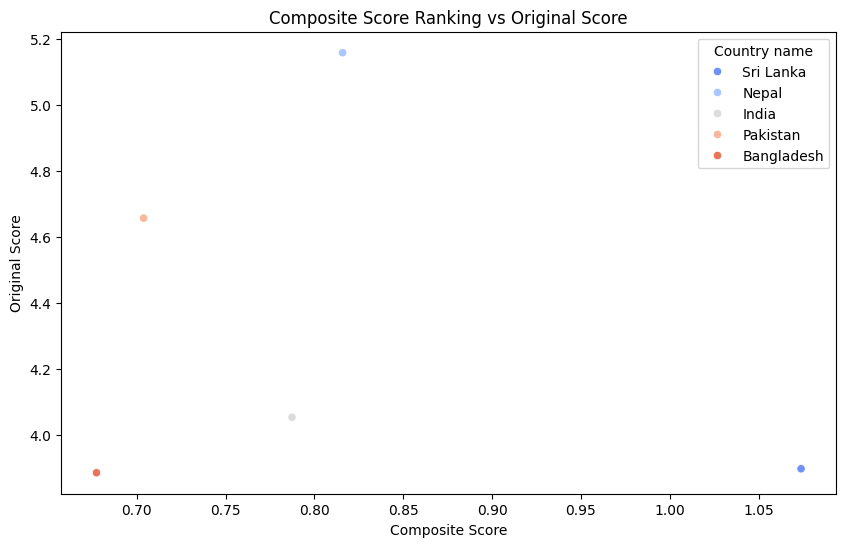

In [20]:
south_asian_data = pd.read_csv('/content/drive/MyDrive/CA/south_asian_data.csv')
# Step 1: Create the Composite Score column
south_asian_data['Composite data']= (
0.40 * south_asian_data['Log GDP per capita'] +
0.30 * south_asian_data['Social support'] +
0.30 * south_asian_data['Healthy life expectancy']
)
south_asian_data['Composite rank'] = south_asian_data['Composite data'].rank(ascending= False)
top_5_countries = south_asian_data.nlargest(5, 'Composite data')
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite data', y='Country name', data=top_5_countries, palette='coolwarm')
plt.title('Top 5 asian countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('COuntry name')
plt.show()
# Step 4: Compare the Composite Score ranking with the original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite data', y='score', data=top_5_countries, hue='Country name', palette = 'coolwarm')
plt.title('Composite Score Ranking vs Original Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.show()

Outlier Countries:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628


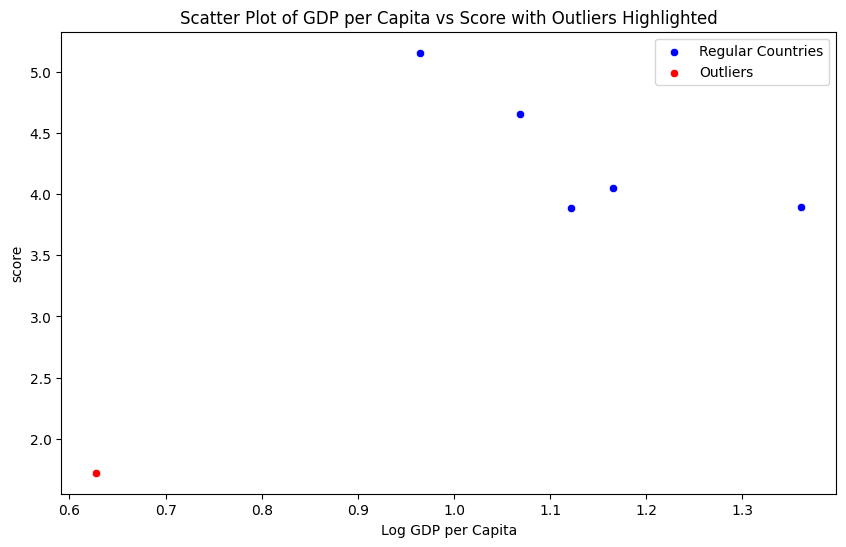

Average Score (with outliers): 3.90.
Average GDP per Capita (with outliers): 1.05.
Average Score (without outliers): 4.33.
Average GDP per Capita (without outliers): 1.14.


In [21]:
#import numpy as np

# Step 1: Calculate IQR for 'Score' and 'Log GDP per capita'
Q1_score = south_asian_data['score'].quantile(0.25)
Q3_score = south_asian_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asian_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Step 2: Define outlier thresholds
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Step 3: Identify outliers
score_outliers = south_asian_data[
    (south_asian_data['score'] < lower_bound_score) | (south_asian_data['score'] > upper_bound_score)
]

gdp_outliers = south_asian_data[
    (south_asian_data['Log GDP per capita'] < lower_bound_gdp) | (south_asian_data['Log GDP per capita'] > upper_bound_gdp)
]

# Combine unique outliers
all_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()
print("Outlier Countries:")
print(all_outliers[['Country name', 'score', 'Log GDP per capita']])
plt.figure(figsize=(10, 6))

# Scatter plot for regular points
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=south_asian_data,
    color='blue',
    label='Regular Countries'
)

# Scatter plot for outliers
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=all_outliers,
    color='red',
    label='Outliers'
)

# Add plot details
plt.title('Scatter Plot of GDP per Capita vs Score with Outliers Highlighted')
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.legend()
plt.show()
# Regional averages with outliers
avg_score_with_outliers = south_asian_data['score'].mean()
avg_gdp_with_outliers = south_asian_data['Log GDP per capita'].mean()
regular_data = south_asian_data[
    ~south_asian_data['Country name'].isin(all_outliers['Country name'])
]

# Regional averages without outliers
avg_score_without_outliers = regular_data['score'].mean()
avg_gdp_without_outliers = regular_data['Log GDP per capita'].mean()

print(f"Average Score (with outliers): {avg_score_with_outliers:.2f}.")
print(f"Average GDP per Capita (with outliers): {avg_gdp_with_outliers:.2f}.")
print(f"Average Score (without outliers): {avg_score_without_outliers:.2f}.")
print(f"Average GDP per Capita (without outliers): {avg_gdp_without_outliers:.2f}.")


Pearson Correlation between Freedom to Make Life Choices and Score: 0.80
Pearson Correlation between Generosity and Score: 0.87


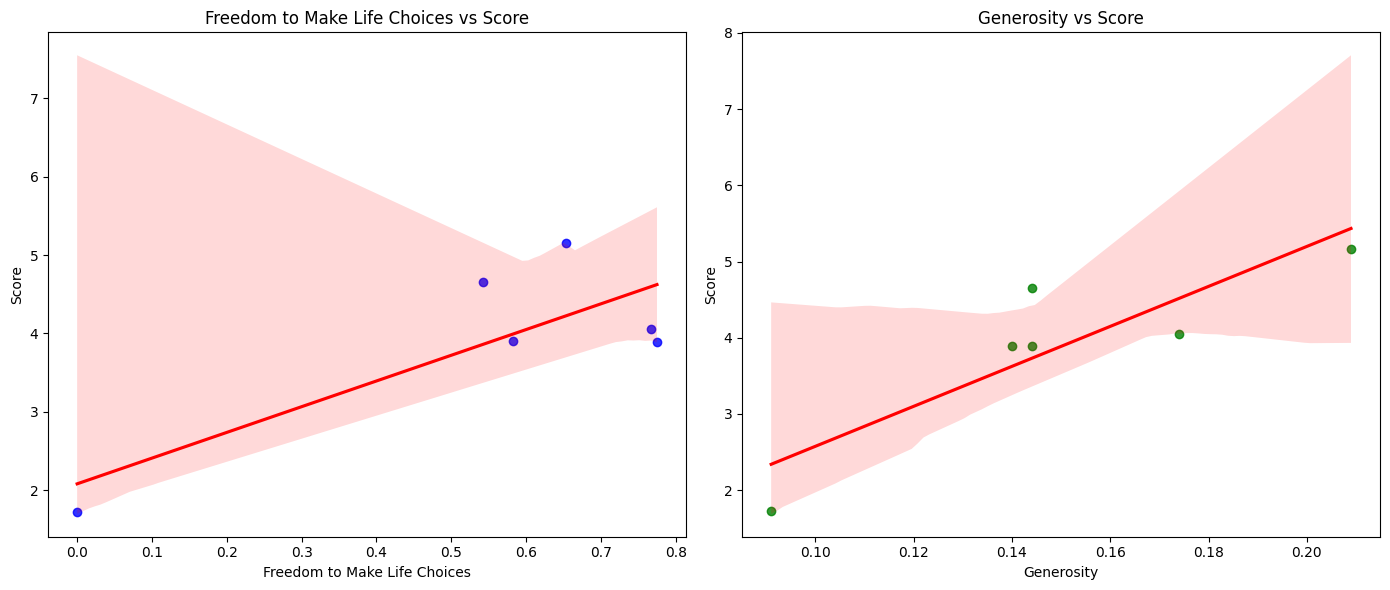


--- Discussion ---
Based on the Pearson correlation, Freedom to Make Life Choices has a correlation of 0.80. This suggests a strong positive relationship between freedom and happiness scores in South Asia.
Generosity has a correlation of 0.87. This indicates a weaker relationship between generosity and happiness, as the correlation is lower.


In [22]:
# Step 1: Calculate the Pearson correlation for 'Freedom to Make Life Choices' and 'Generosity' with 'Score'
correlation_freedom = south_asian_data['Freedom to make life choices'].corr(south_asian_data['score'])
correlation_generosity = south_asian_data['Generosity'].corr(south_asian_data['score'])

print(f"Pearson Correlation between Freedom to Make Life Choices and Score: {correlation_freedom:.2f}")
print(f"Pearson Correlation between Generosity and Score: {correlation_generosity:.2f}")
plt.figure(figsize=(14, 6))

# Scatter plot for Freedom to Make Life Choices vs. Score
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

# Scatter plot for Generosity vs. Score
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asian_data, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()
print("\n--- Discussion ---")

print(f"Based on the Pearson correlation, Freedom to Make Life Choices has a correlation of {correlation_freedom:.2f}. This suggests a strong positive relationship between freedom and happiness scores in South Asia.")
print(f"Generosity has a correlation of {correlation_generosity:.2f}. This indicates a weaker relationship between generosity and happiness, as the correlation is lower.")

<ipython-input-23-f412808ab8d6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=gap_countries, palette='coolwarm')


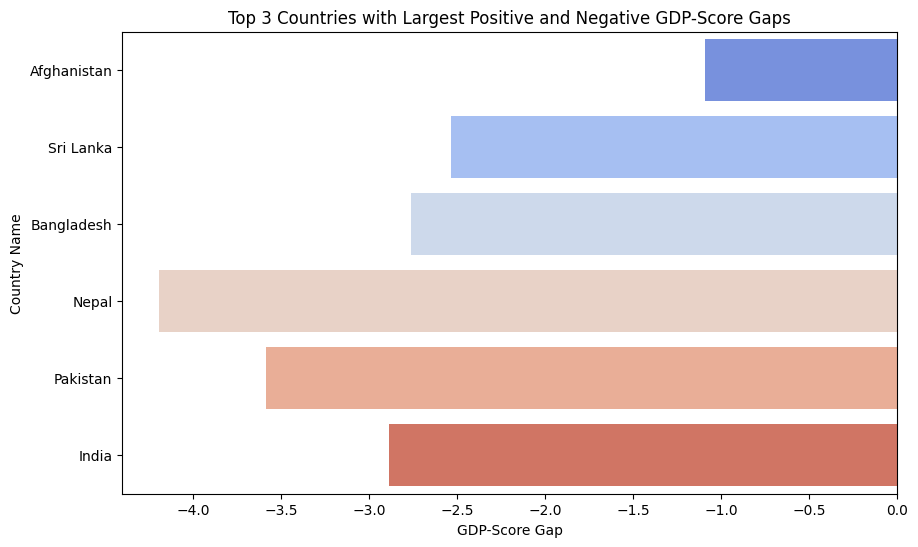


--- Analysis ---
The GDP-Score Gap indicates the difference between the economic prosperity (GDP per capita) and the overall happiness (Score) of a country.
Countries with a large positive gap have high GDP per capita but relatively lower happiness scores, while countries with a large negative gap have lower GDP per capita but relatively higher happiness scores.
Possible reasons for a large positive GDP-Score Gap could be income inequality, political instability, or other socio-economic factors that hinder well-being despite economic growth.
On the other hand, countries with a negative gap might have strong social support systems, healthcare, or cultural factors contributing to a higher happiness score despite lower GDP.


In [23]:
# Step 1: Add a new column for GDP-Score Gap
south_asian_data['GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']

# Step 2: Rank the South Asian countries by GDP-Score Gap in both ascending and descending order
south_asian_data['GDP-Score Gap Ascending Rank'] = south_asian_data['GDP-Score Gap'].rank(ascending=True)
south_asian_data['GDP-Score Gap Descending Rank'] = south_asian_data['GDP-Score Gap'].rank(ascending=False)

# Step 3: Highlight the top 3 countries with the largest positive and negative gaps using a bar chart
top_positive_gap = south_asian_data.nlargest(3, 'GDP-Score Gap')
top_negative_gap = south_asian_data.nsmallest(3, 'GDP-Score Gap')

# Combine the top positive and negative gaps for plotting
gap_countries = pd.concat([top_positive_gap, top_negative_gap])

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=gap_countries, palette='coolwarm')
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country Name')
plt.show()

# Step 4: Analyze the reasons behind these gaps and their implications
print("\n--- Analysis ---")
print("The GDP-Score Gap indicates the difference between the economic prosperity (GDP per capita) and the overall happiness (Score) of a country.")
print("Countries with a large positive gap have high GDP per capita but relatively lower happiness scores, while countries with a large negative gap have lower GDP per capita but relatively higher happiness scores.")
print("Possible reasons for a large positive GDP-Score Gap could be income inequality, political instability, or other socio-economic factors that hinder well-being despite economic growth.")
print("On the other hand, countries with a negative gap might have strong social support systems, healthcare, or cultural factors contributing to a higher happiness score despite lower GDP.")


Problem 3

In [24]:
data = pd.read_csv('/content/drive/MyDrive/CA/WHR-2024-5CS037.csv')
# Step 1: Define the list of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Step 2: Filter the dataset to include only Middle Eastern countries
middle_east_data = data[data['Country name'].isin(middle_east_countries)]

# Step 3: Save the filtered dataframe as a new CSV file for future use
middle_east_data.to_csv('/content/drive/MyDrive/CA/middle_east_data.csv', index=False)

# Step 4: Display the first few rows of the new dataframe
print(middle_east_data.head())


            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    Perceptions of corruption  Dystopia + residual  
4                       0.193                2.298  
12                      0.17

In [25]:
# Step 1: Calculate mean and standard deviation for South Asia
south_asia_mean = south_asian_data['score'].mean()
south_asia_std = south_asian_data['score'].std()

# Step 2: Calculate mean and standard deviation for Middle East
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

# Step 3: Print results
print("South Asia Statistics:")
print(f"Mean Happiness Score: {south_asia_mean:.2f}")
print(f"Standard Deviation of Happiness Score: {south_asia_std:.2f}")

print("\nMiddle East Statistics:")
print(f"Mean Happiness Score: {middle_east_mean:.2f}")
print(f"Standard Deviation of Happiness Score: {middle_east_std:.2f}")

# Step 4: Compare which region has a higher average happiness score
if south_asia_mean > middle_east_mean:
    print("\nSouth Asia has a higher average happiness score.")
else:
    print("\nMiddle East has a higher average happiness score.")


South Asia Statistics:
Mean Happiness Score: 3.90
Standard Deviation of Happiness Score: 1.18

Middle East Statistics:
Mean Happiness Score: 5.41
Standard Deviation of Happiness Score: 1.57

Middle East has a higher average happiness score.


<ipython-input-26-f6658f7967b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_data['Region'] = 'Middle East'


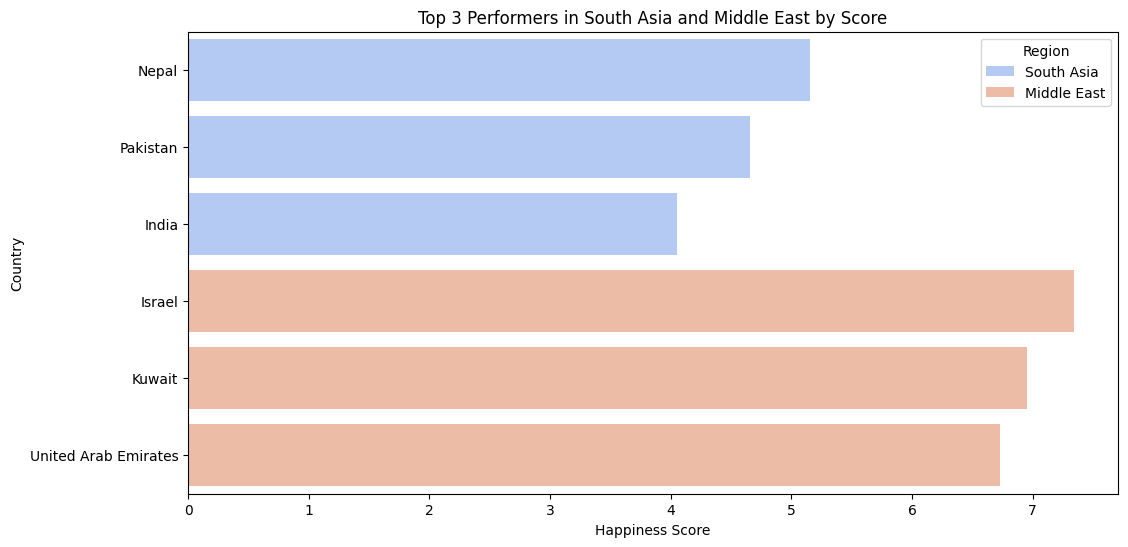

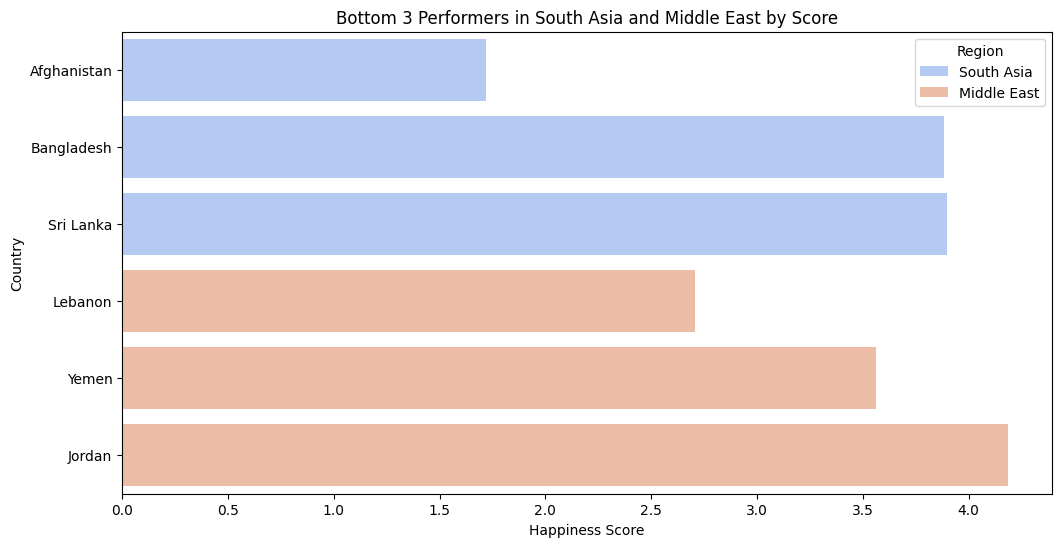

In [26]:
# Add a region column to each dataset
south_asian_data['Region'] = 'South Asia'
middle_east_data['Region'] = 'Middle East'

# Top 3 and bottom 3 performers in South Asia
south_asia_top3 = south_asian_data.nlargest(3, 'score')
south_asia_bottom3 = south_asian_data.nsmallest(3, 'score')

# Top 3 and bottom 3 performers in the Middle East
middle_east_top3 = middle_east_data.nlargest(3, 'score')
middle_east_bottom3 = middle_east_data.nsmallest(3, 'score')

# Combine datasets for plotting
top_performers = pd.concat([south_asia_top3, middle_east_top3])
bottom_performers = pd.concat([south_asia_bottom3, middle_east_bottom3])

# Plotting Top Performers
plt.figure(figsize=(12, 6))
sns.barplot(
    x='score', y='Country name', data=top_performers,
    hue='Region', palette='coolwarm'
)
plt.title("Top 3 Performers in South Asia and Middle East by Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.legend(title="Region")
plt.show()

# Plotting Bottom Performers
plt.figure(figsize=(12, 6))
sns.barplot(
    x='score', y='Country name', data=bottom_performers,
    hue='Region', palette='coolwarm'
)
plt.title("Bottom 3 Performers in South Asia and Middle East by Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.legend(title="Region")
plt.show()

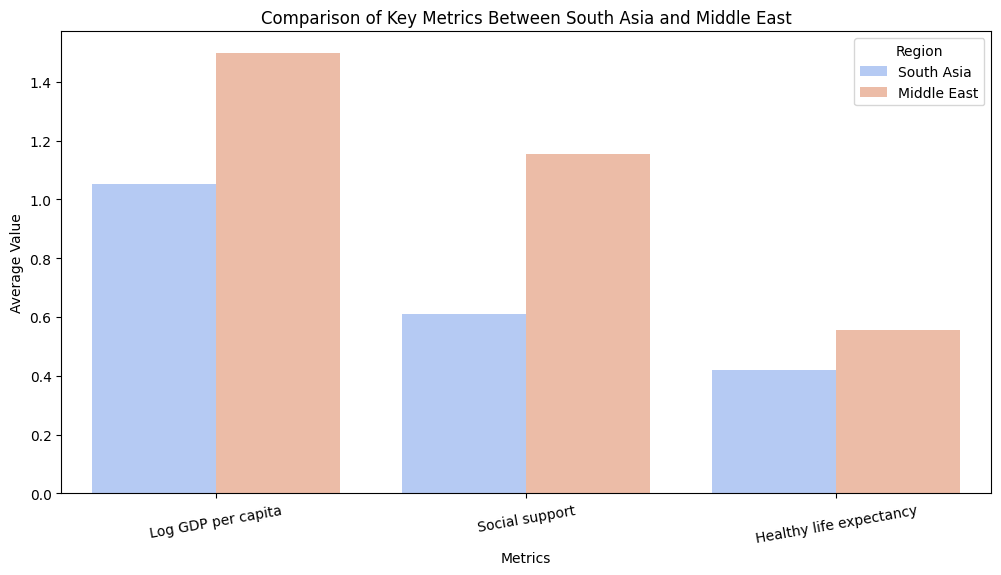

The metric with the largest disparity is: Social support with a difference of 0.54


In [27]:
# Step 1: Calculate mean values for each metric by region
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asian_means = south_asian_data[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

# Combine the mean values into a DataFrame
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': south_asian_means.values,
    'Middle East': middle_east_means.values
})

# Melt the DataFrame for plotting
comparison_melted = comparison_df.melt(id_vars='Metric', var_name='Region', value_name='Value')

# Step 2: Create grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=comparison_melted, palette='coolwarm')
plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.ylabel('Average Value')
plt.xlabel('Metrics')
plt.xticks(rotation=10)
plt.legend(title='Region')
plt.show()

# Step 3: Identify largest disparity
disparities = abs(south_asian_means - middle_east_means)
largest_disparity_metric = disparities.idxmax()
print(f"The metric with the largest disparity is: {largest_disparity_metric} with a difference of {disparities[largest_disparity_metric]:.2f}")

In [28]:
# Step 1: Calculate the range and CV for both regions
def calculate_variability(region_data, region_name):
    score_range = region_data['score'].max() - region_data['score'].min()
    score_mean = region_data['score'].mean()
    score_std = region_data['score'].std()
    cv = (score_std / score_mean) * 100  # Coefficient of Variation in percentage
    return {
        "Region": region_name,
        "Range": score_range,
        "Coefficient of Variation (%)": cv
    }

# Calculate for South Asia
south_asia_variability = calculate_variability(south_asian_data, "South Asia")

# Calculate for Middle East
middle_east_variability = calculate_variability(middle_east_data, "Middle East")

# Combine results into a DataFrame for comparison
variability_df = pd.DataFrame([south_asia_variability, middle_east_variability])

# Step 2: Display results
print(variability_df)

# Step 3: Identify which region has greater variability
greater_variability_region = (
    "South Asia" if south_asia_variability['Coefficient of Variation (%)'] > middle_east_variability['Coefficient of Variation (%)']
    else "Middle East"
)
print(f"\nThe region with greater variability in happiness is: {greater_variability_region}")


        Region  Range  Coefficient of Variation (%)
0   South Asia  3.437                     30.214829
1  Middle East  4.634                     28.938881

The region with greater variability in happiness is: South Asia


Correlation Matrix for South Asia:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  

Correlation Matrix for Middle East:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


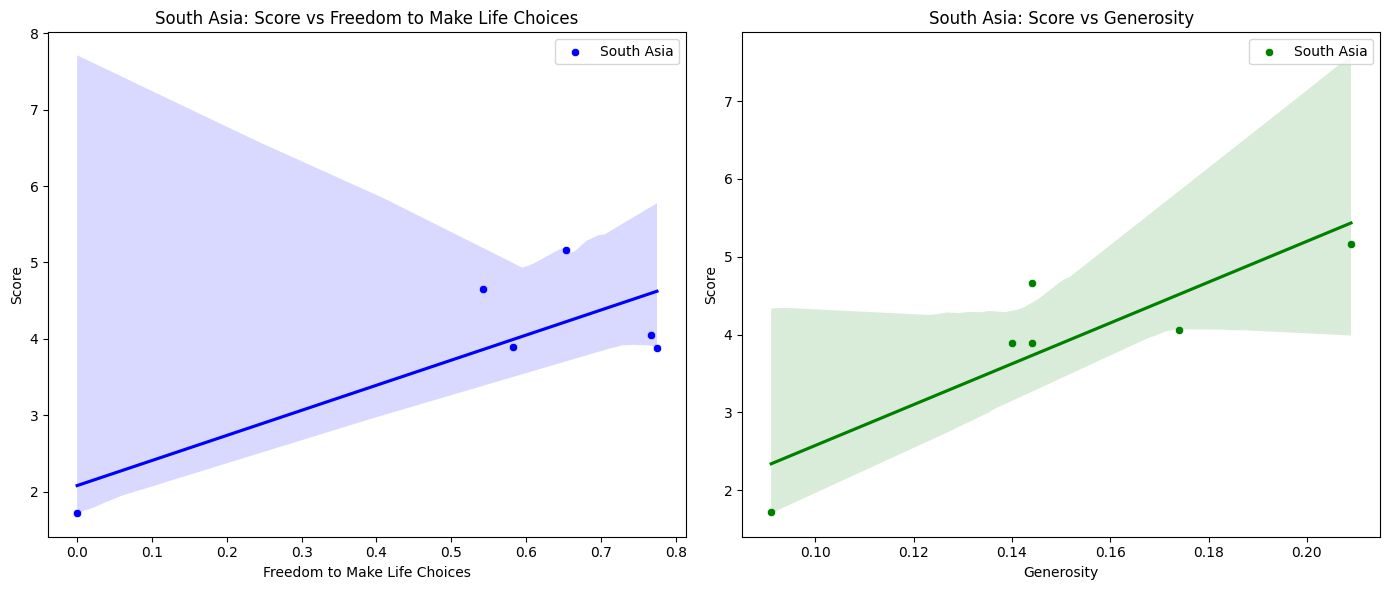

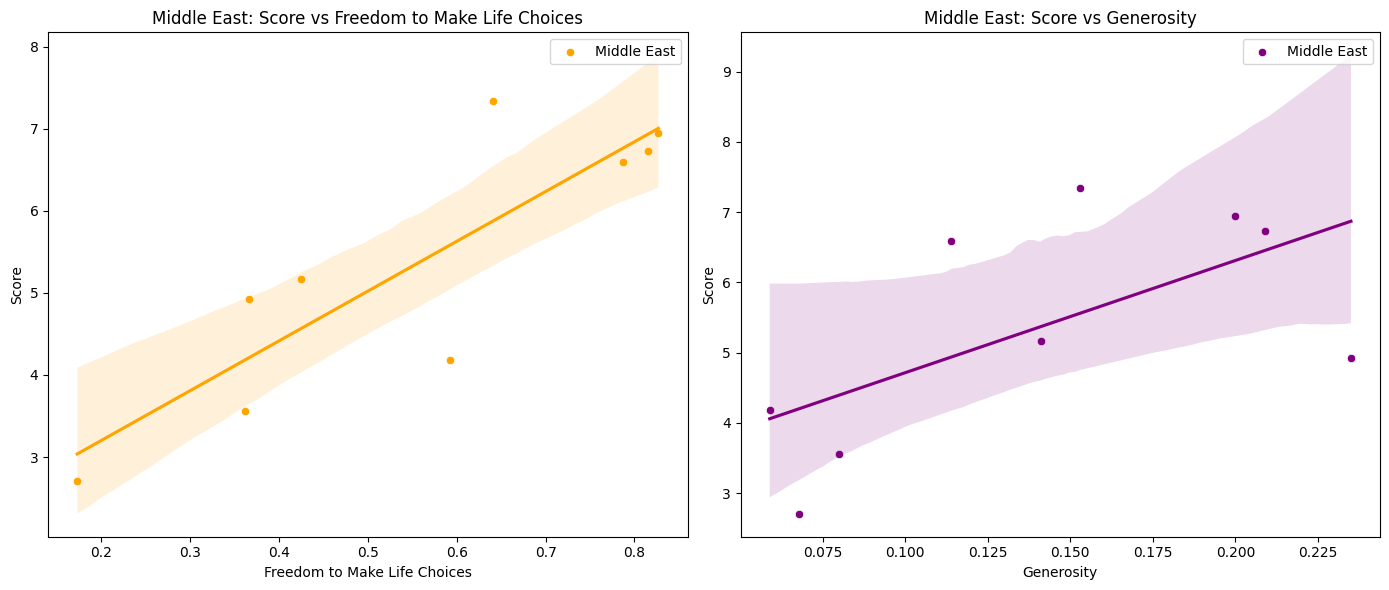

In [29]:
# Step 1: Calculate correlations for South Asia
south_asian_corr = south_asian_data[['score', 'Freedom to make life choices', 'Generosity']].corr()
print("Correlation Matrix for South Asia:")
print(south_asian_corr)

# Step 2: Calculate correlations for Middle East
middle_east_corr = middle_east_data[['score', 'Freedom to make life choices', 'Generosity']].corr()
print("\nCorrelation Matrix for Middle East:")
print(middle_east_corr)

# Step 3: Create scatter plots for South Asia
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='Freedom to make life choices', y='score', data=south_asian_data,
    color='blue', label='South Asia'
)
sns.regplot(
    x='Freedom to make life choices', y='score', data=south_asian_data,
    scatter=False, color='blue'
)
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(
    x='Generosity', y='score', data=south_asian_data,
    color='green', label='South Asia'
)
sns.regplot(
    x='Generosity', y='score', data=south_asian_data,
    scatter=False, color='green'
)
plt.title('South Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# Step 4: Create scatter plots for Middle East
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='Freedom to make life choices', y='score', data=middle_east_data,
    color='orange', label='Middle East'
)
sns.regplot(
    x='Freedom to make life choices', y='score', data=middle_east_data,
    scatter=False, color='orange'
)
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(
    x='Generosity', y='score', data=middle_east_data,
    color='purple', label='Middle East'
)
sns.regplot(
    x='Generosity', y='score', data=middle_east_data,
    scatter=False, color='purple'
)
plt.title('Middle East: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

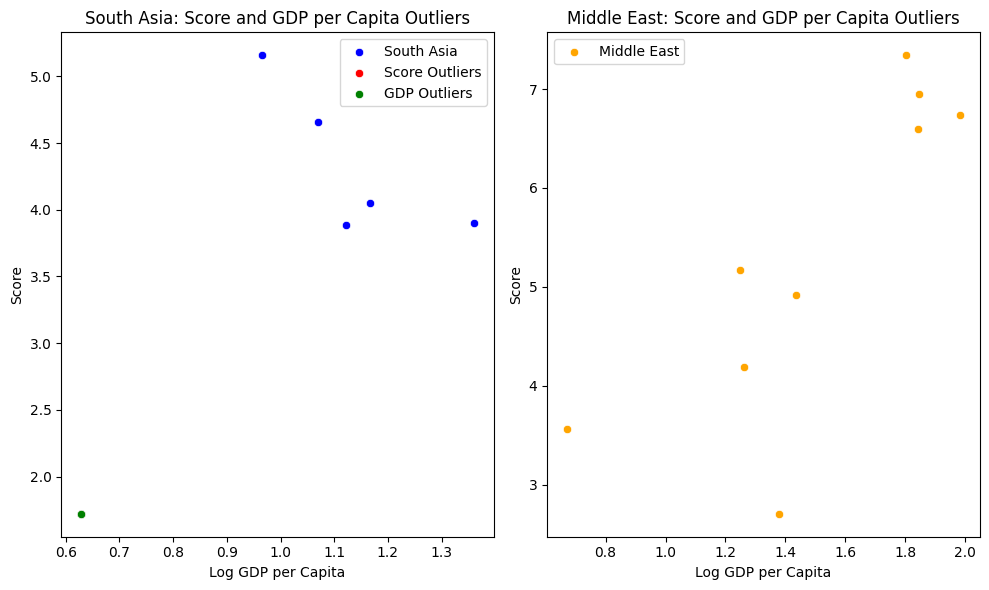

South Asia Score Outliers:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628

South Asia GDP Outliers:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628

Middle East Score Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []

Middle East GDP Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [30]:
import numpy as np

# Step 1: Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Step 2: Detect outliers for both regions (South Asia and Middle East)
south_asian_score_outliers, _, _ = detect_outliers(south_asian_data, 'score')
south_asian_gdp_outliers, _, _ = detect_outliers(south_asian_data, 'Log GDP per capita')

middle_east_score_outliers, _, _ = detect_outliers(middle_east_data, 'score')
middle_east_gdp_outliers, _, _ = detect_outliers(middle_east_data, 'Log GDP per capita')

# Step 3: Plot outliers for South Asia
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_data, label='South Asia', color='blue')
sns.scatterplot(x=south_asian_score_outliers['Log GDP per capita'], y=south_asian_score_outliers['score'], color='red', label='Score Outliers')
sns.scatterplot(x=south_asian_gdp_outliers['Log GDP per capita'], y=south_asian_gdp_outliers['score'], color='green', label='GDP Outliers')
plt.title('South Asia: Score and GDP per Capita Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()

# Step 4: Plot outliers for Middle East
plt.subplot(1, 2, 2)
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, label='Middle East', color='orange')
sns.scatterplot(x=middle_east_score_outliers['Log GDP per capita'], y=middle_east_score_outliers['score'], color='red', label='Score Outliers')
sns.scatterplot(x=middle_east_gdp_outliers['Log GDP per capita'], y=middle_east_gdp_outliers['score'], color='green', label='GDP Outliers')
plt.title('Middle East: Score and GDP per Capita Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Print outlier countries for both regions
print("South Asia Score Outliers:")
print(south_asian_score_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nSouth Asia GDP Outliers:")
print(south_asian_gdp_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Score Outliers:")
print(middle_east_score_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East GDP Outliers:")
print(middle_east_gdp_outliers[['Country name', 'score', 'Log GDP per capita']])


<ipython-input-31-a28c69c20285>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_data['Region'] = 'Middle East'
<ipython-input-31-a28c69c20285>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=combined_data, palette='Set2')


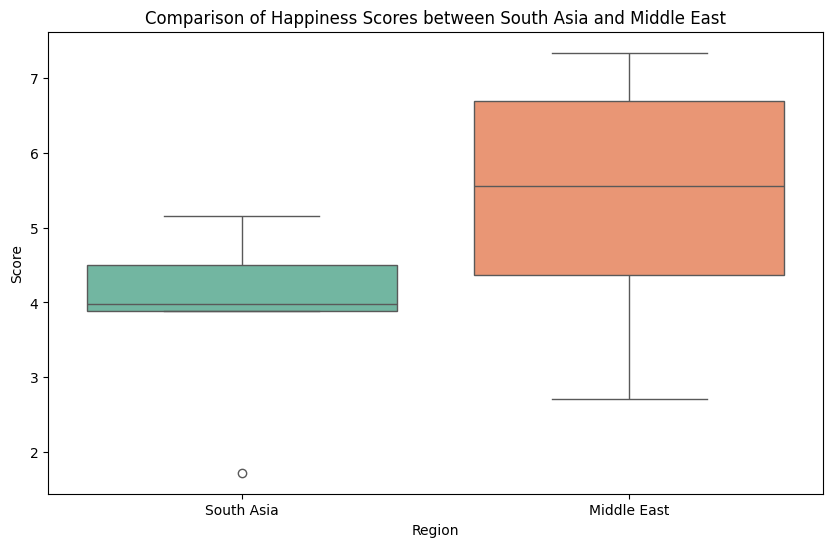

In [31]:
# Step 1: Combine South Asia and Middle East data
# Add a new column 'Region' to identify each region
south_asian_data['Region'] = 'South Asia'
middle_east_data['Region'] = 'Middle East'

# Combine both DataFrames
combined_data = pd.concat([south_asian_data[['Country name', 'score', 'Region']],
                           middle_east_data[['Country name', 'score', 'Region']]], ignore_index=True)

# Step 2: Create a boxplot comparing the distribution of Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_data, palette='Set2')

# Add titles and labels
plt.title('Comparison of Happiness Scores between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')

# Show the plot
plt.show()